# install GPU

# Import packages 

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl

from glob import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from IPython import display
from tqdm.notebook import trange
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Dense, Flatten, Activation
from keras.models import load_model
from tqdm import tqdm

# get Data :

from drive

# Preparation Data :

affecter les folder a une list files

In [2]:
directory = "dataset/"
files=os.listdir(directory)
files

['aishwarya_rai',
 'angelina_jolie',
 'arnold_schwarzenegger',
 'bhuvan_bam',
 'brad_pitt',
 'David_Schwimmer',
 'dhoni',
 'hardik_pandya',
 'Jennifer_Aniston',
 'Jim_Parsons',
 'Johnny_Galeck',
 'Kunal_Nayya',
 'Lisa_Kudrow',
 'manoj_bajpayee',
 'Matthew_Perry',
 'Matt_LeBlanc',
 'messi',
 'mohamed_ali',
 'Pankaj_Tripathi',
 'pewdiepie',
 'ROHIT_SHARMA',
 'ronaldo',
 'Sachin_Tendulka',
 'scarlett_johansson',
 'Simon_Helberg',
 'suresh_raina',
 'sylvester_stallone',
 'virat_kohli']

resize data

In [3]:
image_array=[]  # it's a list later i will convert it to array
label_array=[]
#path="../content/dataset/"
# loop through each sub-folder in train
for i in range(len(files)):
    # files in sub-folder
    file_sub=os.listdir(directory+files[i])

    for k in tqdm(range(len(file_sub))):
        try:
            img=cv2.imread(directory+files[i]+"/"+file_sub[k])#prendre image ../content/dataset/messi/0.jpg c-a-d image (s'adepend k)de premier folder (s'adepend i)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(96,96))
            image_array.append(img)
            label_array.append(i)
        except:
            pass

100%|███████████████████████████████████████████████████████████████████████████████| 391/391 [00:01<00:00, 255.98it/s]


In [4]:
import gc
gc.collect()

119

normalization

In [5]:
image_array=np.array(image_array)/255.0
label_array=np.array(label_array)

division des données (train et test)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(image_array,label_array,test_size=0.15)

In [7]:
from keras import layers,callbacks,utils,applications,optimizers
from keras.models import Sequential,Model,load_model

In [8]:
len(files)

28

# Build Model

In [9]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import keras
 
'''Initializing the Convolutional Neural Network'''
model= Sequential()
 
''' STEP--1 Convolution'''

model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(96,96,3), activation='tanh'))
 
'''# STEP--2 MAX Pooling'''
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
 
'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
model.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
 
model.add(MaxPool2D(pool_size=(2,2)))
 
'''# STEP--3 FLattening'''
model.add(Flatten())
 
'''# STEP--4 Fully Connected Neural Network'''
model.add(Dense(64, activation='relu'))
model.add(Dense(len(files), activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 64)                1

# compile Model

In [10]:
'''# Compiling the CNN'''
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [185]:

EPOCHS=10
BATCH_SIZE=400


history=model.fit(X_train,Y_train,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 validation_data=(X_test,Y_test),
                 )

Epoch 1/10
 1/28 [>.............................] - ETA: 2:07 - loss: 3.3711 - accuracy: 0.0450

KeyboardInterrupt: 

# Save Model

In [132]:
model.save("modelvf.h5")

convert Model to .tflite

# Teste Model

In [11]:
from keras.models import load_model

def Affiche_image(name_index):
    j=1;
    print(files[name_index])
    for i in range(len(Y_test)):
        if(name_index == Y_test[i]):
            plt.imshow(X_test[i])
            plt.show()
            j+=1
        if(j==4):
            break         

def get_similaireIMG(image):
    X = image.reshape((1,) + image.shape)
    y_predic = model.predict(X)
    print("Welcome Monsieur : ",str(y_predic))
    print("Vous 5 Similaire sont : ")
    for i in range(5) :
        predectionMax = np.argmax(y_predic)
        predection = y_predic[0][predectionMax]
        if(predection > 0): # pour eviter de prendre les valeur null comme similaire.
            Nome = files[predectionMax]
            #print(predectionMax)
            print("\nNome : ",Nome)
            print("\nindex dans y^: ",str(predectionMax)," i = ",str(i)," : ","\n predection : ",predection)
            Affiche_image(predectionMax)
            y_predic[0][predectionMax] = -1

def get_image(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(96,96))
    return img

1/1 [==============================] - 0s 27ms/step
Welcome Monsieur :  [[0.02995473 0.0077886  0.030504   0.06327435 0.03563989 0.07642023
  0.04668361 0.01438764 0.0373403  0.04331066 0.01963042 0.02125353
  0.01738113 0.0137912  0.01568331 0.04964347 0.02468846 0.01400746
  0.02466433 0.09400101 0.03487245 0.07349926 0.02142442 0.06704018
  0.01589907 0.0163591  0.06654652 0.02431071]]
Vous 5 Similaire sont : 

Nome :  pewdiepie

index dans y^:  19  i =  0  :  
 predection :  0.09400101
pewdiepie


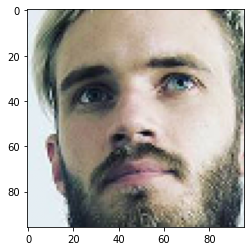

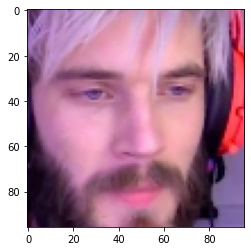

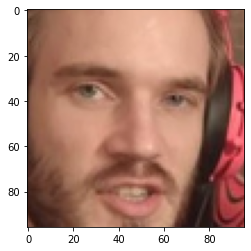


Nome :  David_Schwimmer

index dans y^:  5  i =  1  :  
 predection :  0.076420225
David_Schwimmer


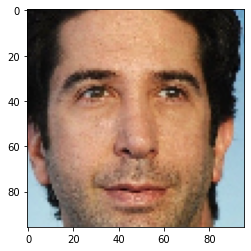

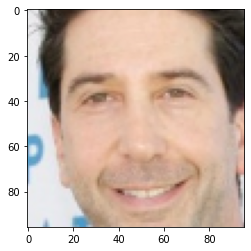

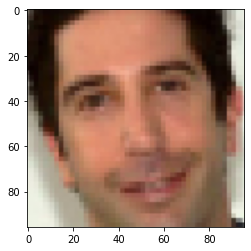


Nome :  ronaldo

index dans y^:  21  i =  2  :  
 predection :  0.07349926
ronaldo


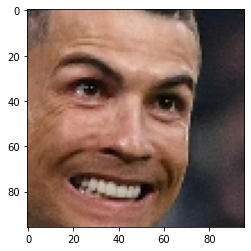

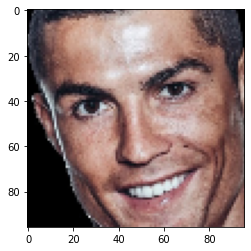

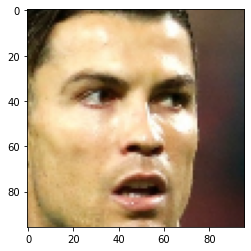


Nome :  scarlett_johansson

index dans y^:  23  i =  3  :  
 predection :  0.06704018
scarlett_johansson


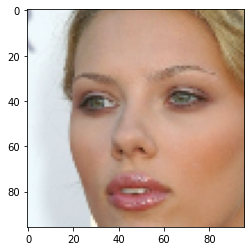

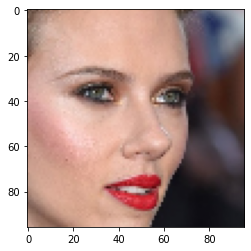

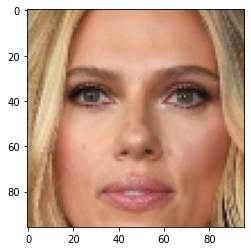


Nome :  sylvester_stallone

index dans y^:  26  i =  4  :  
 predection :  0.06654652
sylvester_stallone


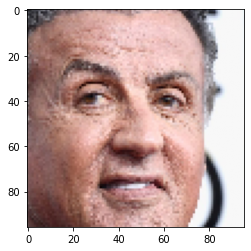

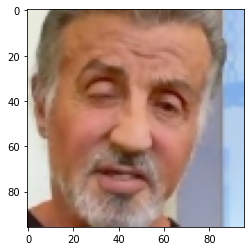

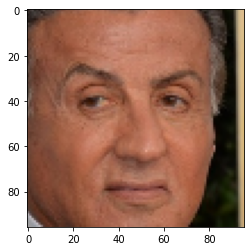

In [13]:
path = "images.jpg"
img = get_image(path)
get_similaireIMG(img)